# TFG
## Estudio sobre el impacto de la distribución de los datos en la equidad de modelos de aprendizaje federado

Lucía Azcona Furtado


In [1]:
from funciones_tfg import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

2026-01-12 21:36:11.001222: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-12 21:36:11.002158: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-12 21:36:11.004512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/mnt/c/Users/lucia/tff_env/lib/python3.10/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Escenario: Independiente e idénticamente distribuido
### Experimento 1: iid

63/63 [==============================] - 0s 999us/step
Intervalo de confianza Fed Accuracy: (0.8386441949841951, 0.8460558050158048)
Intervalo de confianza Fed Disparate Impact: (0.20028209009480177, 0.2634015521304369)
Intervalo de confianza Centralizado Accuracy: (0.844283601563472, 0.8541163984365281)
Intervalo de confianza Centralizado Disparate Impact: (0.20568548868087055, 0.2905695230289217)


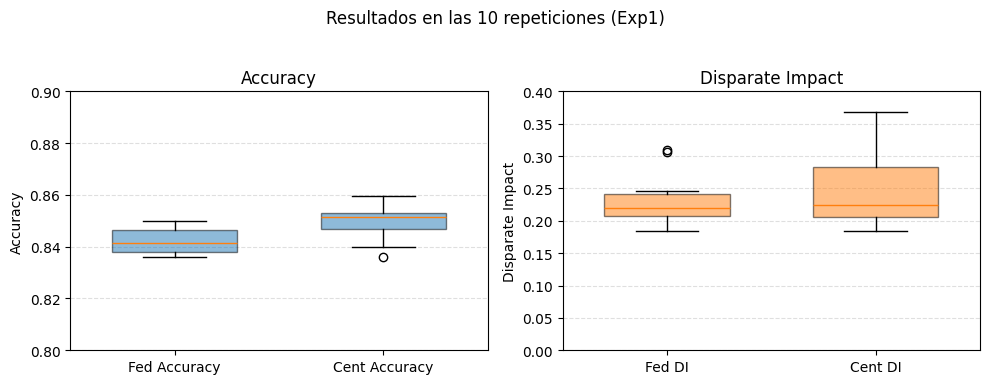

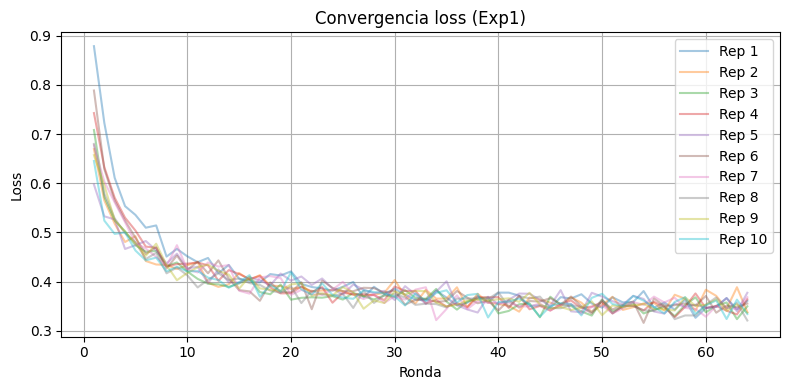

In [5]:
VARIABLE_SENSIBLE = 'Sex'  # 'Sex' u 'OrigEthn' o 'Target' si el repartimos por la target
MODELO = 'simple'
PORCENTAJE_TEST = 0.2
N_REPETICIONES = 10
NUM_CLIENTES = 100
N_ROUNDS = 64
MAX_DATOS = 10000
MODO_SESGO_CLIENTES = 'aleatorio' # 'mayoritario', 'minoritario' o 'aleatorio' 

C_MIN = 0.1
C_MAX = 0.1

# Modo de reparto:
#    0: iid
#    1: no-iid por variable sensible S
#    2: no-iid por target Y (mismo esquema que S)
MODO_REPARTO = 0

FICHERO_PROPORCIONES = "proporciones_clientes.csv"

res1 = algoritmo_principal(
    VARIABLE_SENSIBLE,
    MODELO,
    PORCENTAJE_TEST,
    N_REPETICIONES,
    NUM_CLIENTES,
    N_ROUNDS,
    MAX_DATOS,
    MODO_SESGO_CLIENTES,
    C_MIN,
    C_MAX,
    MODO_REPARTO,
    nombre_exp="Exp1"
)

## Escenario: No-iid por variable sensible ('Sex')

### Experimento 2: no-IID(S) aleatorio

62/62 [==============================] - 0s 907us/step
Intervalo de confianza Fed Accuracy: (0.8517503538054804, 0.8620880300329034)
Intervalo de confianza Fed Disparate Impact: (0.2103491561793317, 0.2518524603839373)
Intervalo de confianza Centralizado Accuracy: (0.8593674540615381, 0.8687133540192702)
Intervalo de confianza Centralizado Disparate Impact: (0.22329043738121848, 0.2630549252383695)


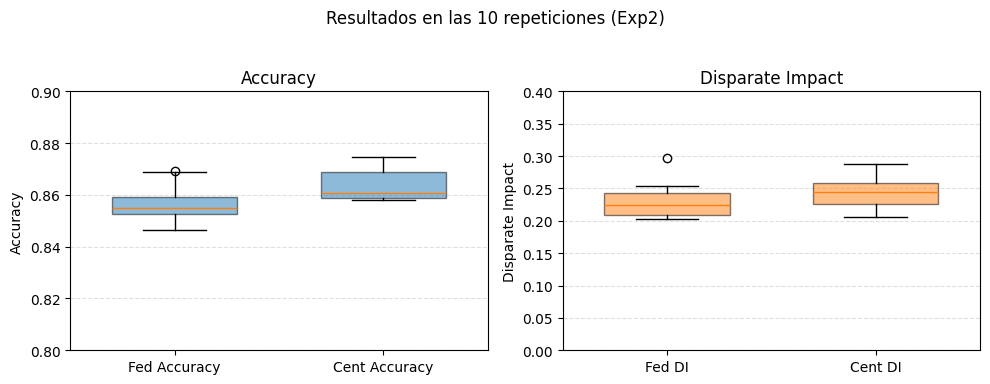

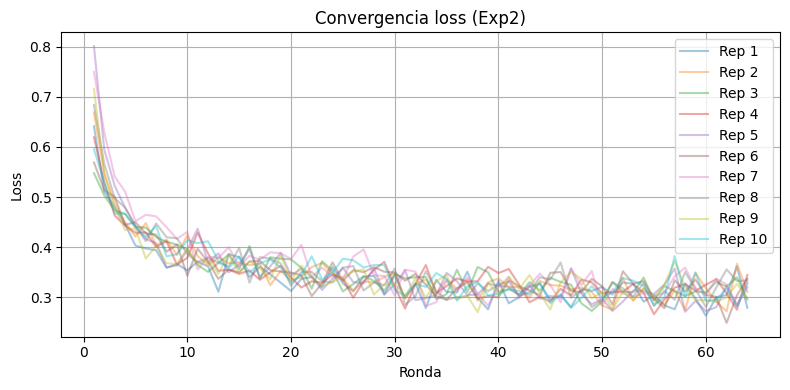

In [3]:
VARIABLE_SENSIBLE = 'Sex'  # 'Sex' u 'OrigEthn' o 'Target' si el repartimos por la tarjet
MODELO = 'simple'
PORCENTAJE_TEST = 0.2
N_REPETICIONES = 10
NUM_CLIENTES = 100
N_ROUNDS = 64
MAX_DATOS = 10000
MODO_SESGO_CLIENTES = 'aleatorio' # 'mayoritario', 'minoritario' o 'aleatorio' 

C_MIN = 0.1
C_MAX = 0.1

# Modo de reparto:
#    0: iid
#    1: no-iid por variable sensible S
#    2: no-iid por target Y (mismo esquema que S)
MODO_REPARTO = 1

FICHERO_PROPORCIONES = "proporciones_clientes.csv"

res3 = algoritmo_principal(
    VARIABLE_SENSIBLE,
    MODELO,
    PORCENTAJE_TEST,
    N_REPETICIONES,
    NUM_CLIENTES,
    N_ROUNDS,
    MAX_DATOS,
    MODO_SESGO_CLIENTES,
    C_MIN,
    C_MAX,
    MODO_REPARTO,
    nombre_exp="Exp2"
)

### Experimento 3: no-IID(S) mayoritario

E0112 21:37:21.767823600    8576 socket_utils_common_posix.cc:221] check for SO_REUSEPORT: {"created":"@1768250241.767783900","description":"Protocol not available","errno":92,"file":"external/com_github_grpc_grpc/src/core/lib/iomgr/socket_utils_common_posix.cc","file_line":199,"os_error":"Protocol not available","syscall":"getsockopt(SO_REUSEPORT)"}
E0112 21:37:21.768683700    8576 socket_utils_common_posix.cc:327] setsockopt(TCP_USER_TIMEOUT) Protocol not available


62/62 [==============================] - 0s 1ms/step
Intervalo de confianza Fed Accuracy: (0.8474812529258504, 0.8624177369731394)
Intervalo de confianza Fed Disparate Impact: (0.18539604698794954, 0.2574199133829851)
Intervalo de confianza Centralizado Accuracy: (0.8652749211346148, 0.8759372000775062)
Intervalo de confianza Centralizado Disparate Impact: (0.2168898663224539, 0.2767371205575946)


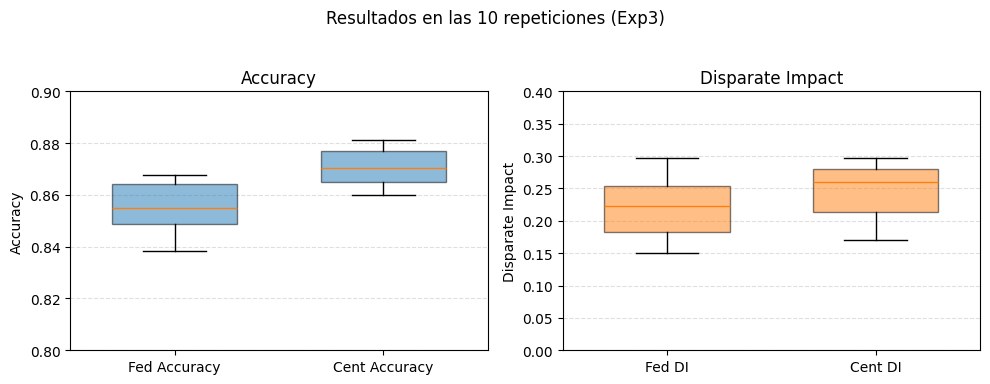

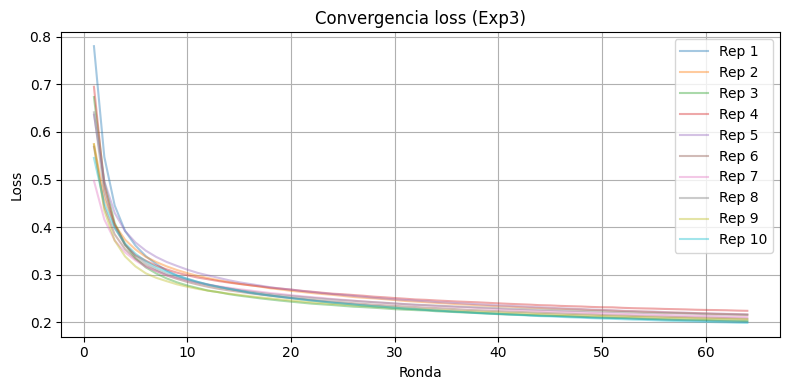

In [2]:
VARIABLE_SENSIBLE = 'Sex'  # 'Sex' u 'OrigEthn' o 'Target' si el repartimos por la tarjet
MODELO = 'simple'
PORCENTAJE_TEST = 0.2
N_REPETICIONES = 10
NUM_CLIENTES = 100
N_ROUNDS = 64
MAX_DATOS = 10000
MODO_SESGO_CLIENTES = 'mayoritario' # 'mayoritario', 'minoritario' o 'aleatorio' 

C_MIN = 0.1
C_MAX = 0.1

# Modo de reparto:
#    0: iid
#    1: no-iid por variable sensible S
#    2: no-iid por target Y (mismo esquema que S)
MODO_REPARTO = 1

FICHERO_PROPORCIONES = "proporciones_clientes.csv"

res3 = algoritmo_principal(
    VARIABLE_SENSIBLE,
    MODELO,
    PORCENTAJE_TEST,
    N_REPETICIONES,
    NUM_CLIENTES,
    N_ROUNDS,
    MAX_DATOS,
    MODO_SESGO_CLIENTES,
    C_MIN,
    C_MAX,
    MODO_REPARTO,
    nombre_exp="Exp3"
)

### Experimento 4: no-IID(S) minoritario

E0112 10:45:46.142245300   22335 socket_utils_common_posix.cc:221] check for SO_REUSEPORT: {"created":"@1768211146.142201700","description":"Protocol not available","errno":92,"file":"external/com_github_grpc_grpc/src/core/lib/iomgr/socket_utils_common_posix.cc","file_line":199,"os_error":"Protocol not available","syscall":"getsockopt(SO_REUSEPORT)"}
E0112 10:45:46.143036000   22335 socket_utils_common_posix.cc:327] setsockopt(TCP_USER_TIMEOUT) Protocol not available


62/62 [==============================] - 0s 1ms/step
Intervalo de confianza Fed Accuracy: (0.8513707978577606, 0.867013040526078)
Intervalo de confianza Fed Disparate Impact: (0.42116866646168694, 0.5313212676143038)
Intervalo de confianza Centralizado Accuracy: (0.8638567908136712, 0.878264421307541)
Intervalo de confianza Centralizado Disparate Impact: (0.215888191093014, 0.25173522341807275)


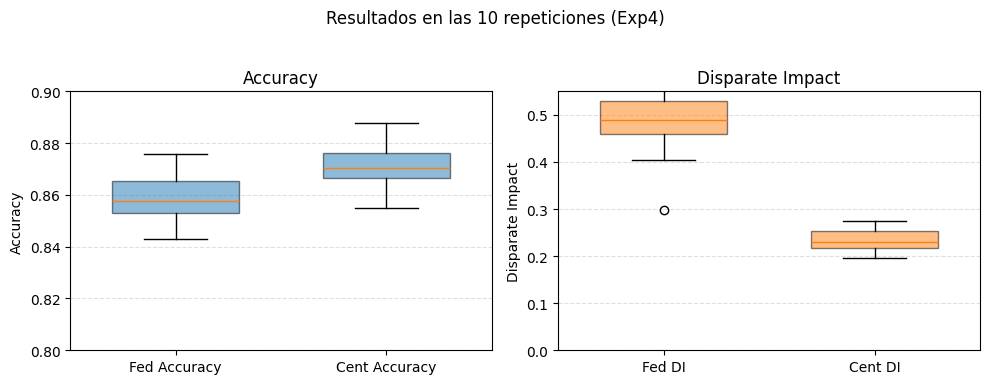

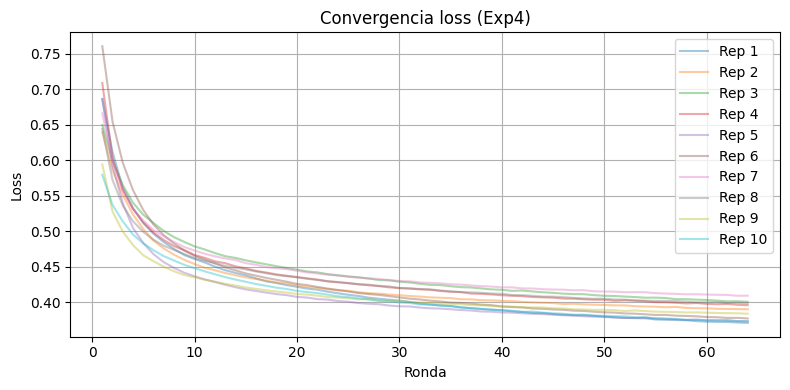

In [2]:
VARIABLE_SENSIBLE = 'Sex'  # 'Sex' u 'OrigEthn' o 'Target' si el repartimos por la tarjet
MODELO = 'simple'
PORCENTAJE_TEST = 0.2
N_REPETICIONES = 10
NUM_CLIENTES = 100
N_ROUNDS = 64
MAX_DATOS = 10000
MODO_SESGO_CLIENTES = 'minoritario' # 'mayoritario', 'minoritario' o 'aleatorio' 

C_MIN = 0.1
C_MAX = 0.1

# Modo de reparto:
#    0: iid
#    1: no-iid por variable sensible S
#    2: no-iid por target Y (mismo esquema que S)
MODO_REPARTO = 1

FICHERO_PROPORCIONES = "proporciones_clientes.csv"

res2 = algoritmo_principal(
    VARIABLE_SENSIBLE,
    MODELO,
    PORCENTAJE_TEST,
    N_REPETICIONES,
    NUM_CLIENTES,
    N_ROUNDS,
    MAX_DATOS,
    MODO_SESGO_CLIENTES,
    C_MIN,
    C_MAX,
    MODO_REPARTO,
    nombre_exp="Exp4"
)

## Escenario: No-iid por variable clase (Y)

### Experimento 5: no-IID(Y) variable sensible: 'Sex'

57/57 [==============================] - 0s 2ms/step
Intervalo de confianza Fed Accuracy: (0.6589328274234422, 0.7042539857633711)
Intervalo de confianza Fed Disparate Impact: (0.21813282766380993, 0.33137848657274205)
Intervalo de confianza Centralizado Accuracy: (0.8143426361407723, 0.8207123089141729)
Intervalo de confianza Centralizado Disparate Impact: (0.3757650980634266, 0.4134465112017047)


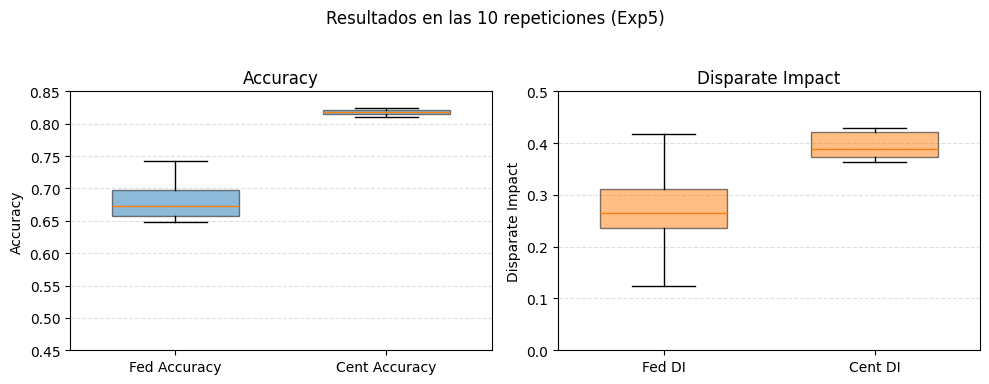

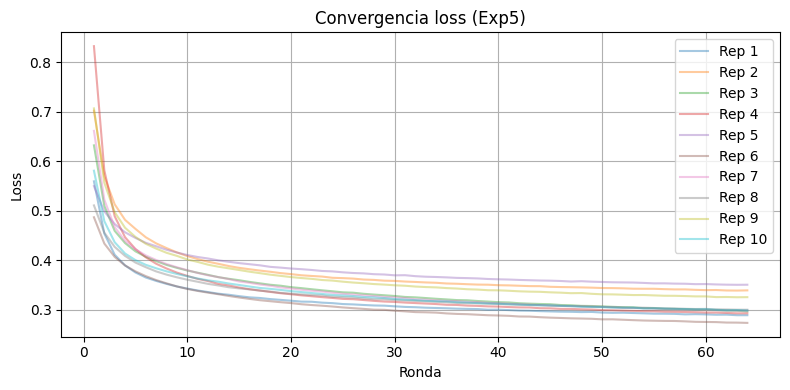

In [3]:
VARIABLE_SENSIBLE = 'Sex'  # 'Sex' u 'OrigEthn' o 'Target' si el repartimos por la tarjet
MODELO = 'simple'
PORCENTAJE_TEST = 0.2
N_REPETICIONES = 10
NUM_CLIENTES = 100
N_ROUNDS = 64
MAX_DATOS = 10000
MODO_SESGO_CLIENTES = 'mayoritario' # 'mayoritario', 'minoritario' o 'aleatorio' 

C_MIN = 0.1
C_MAX = 0.1

# Modo de reparto:
#    0: iid
#    1: no-iid por variable sensible S
#    2: no-iid por target Y (mismo esquema que S)
MODO_REPARTO = 2

FICHERO_PROPORCIONES = "proporciones_clientes.csv"

res2 = algoritmo_principal(
    VARIABLE_SENSIBLE,
    MODELO,
    PORCENTAJE_TEST,
    N_REPETICIONES,
    NUM_CLIENTES,
    N_ROUNDS,
    MAX_DATOS,
    MODO_SESGO_CLIENTES,
    C_MIN,
    C_MAX,
    MODO_REPARTO,
    nombre_exp="Exp5"
)


### Experimento 6: no-IID(Y) variable sensible: 'Target'

57/57 [==============================] - 0s 1ms/step
Intervalo de confianza Fed Accuracy: (0.5663519303961473, 0.5782634542192371)
Intervalo de confianza Fed Disparate Impact: (0.26637321968867367, 0.40969474513229254)
Intervalo de confianza Centralizado Accuracy: (0.8138033688517796, 0.8226801476317367)
Intervalo de confianza Centralizado Disparate Impact: (0.3669496189572701, 0.4053271425711553)


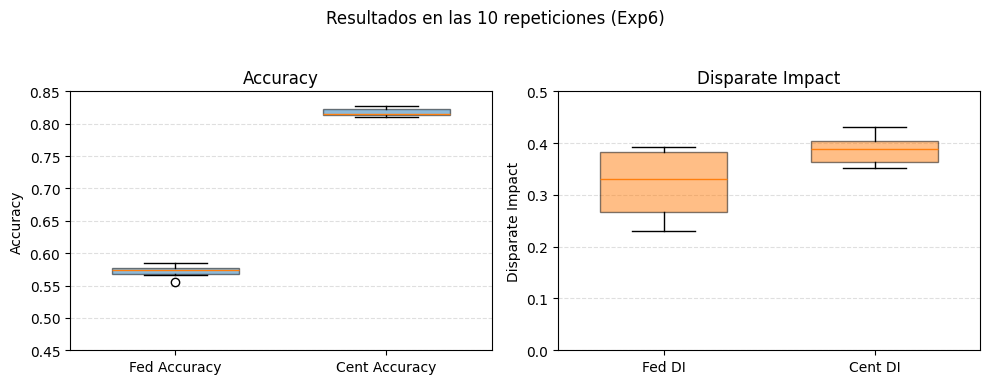

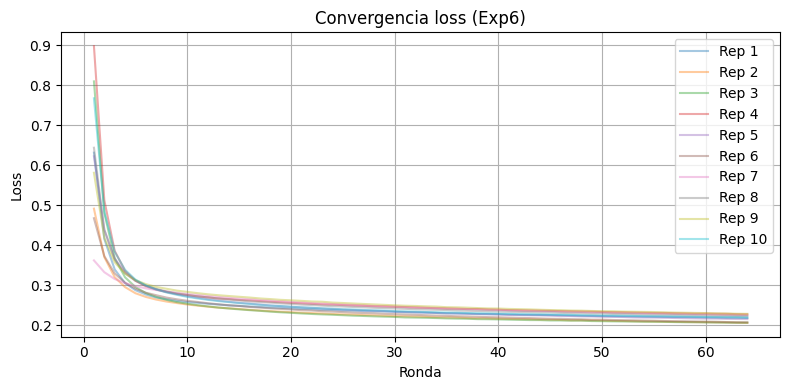

In [3]:
VARIABLE_SENSIBLE = 'Target'  # 'Sex' u 'OrigEthn' o 'Target' si el repartimos por la tarjet
MODELO = 'simple'
PORCENTAJE_TEST = 0.2
N_REPETICIONES = 10
NUM_CLIENTES = 100
N_ROUNDS = 64
MAX_DATOS = 10000
MODO_SESGO_CLIENTES = 'mayoritario' # 'mayoritario', 'minoritario' o 'aleatorio' 

C_MIN = 0.1
C_MAX = 0.1

# Modo de reparto:
#    0: iid
#    1: no-iid por variable sensible S
#    2: no-iid por target Y (mismo esquema que S)
MODO_REPARTO = 2

FICHERO_PROPORCIONES = "proporciones_clientes.csv"

res2 = algoritmo_principal(
    VARIABLE_SENSIBLE,
    MODELO,
    PORCENTAJE_TEST,
    N_REPETICIONES,
    NUM_CLIENTES,
    N_ROUNDS,
    MAX_DATOS,
    MODO_SESGO_CLIENTES,
    C_MIN,
    C_MAX,
    MODO_REPARTO,
    nombre_exp="Exp6"
)